<a href="https://colab.research.google.com/github/yeiniz/DAP/blob/main/lecture12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Image Processing**







##Load the Dependencies

> This section loads some required libraries used in this notebook: **numpy**, **pandas**, **cv2**, **skimage**, **PIL**, **matplotlib**







In [35]:
import numpy as np
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

Read Image from Urls

> In this step we will read images from urls, and display them using openCV, please note the difference when reading image in RGB and BGR format. The default input color channels are in BGR format for openCV.

RGB?

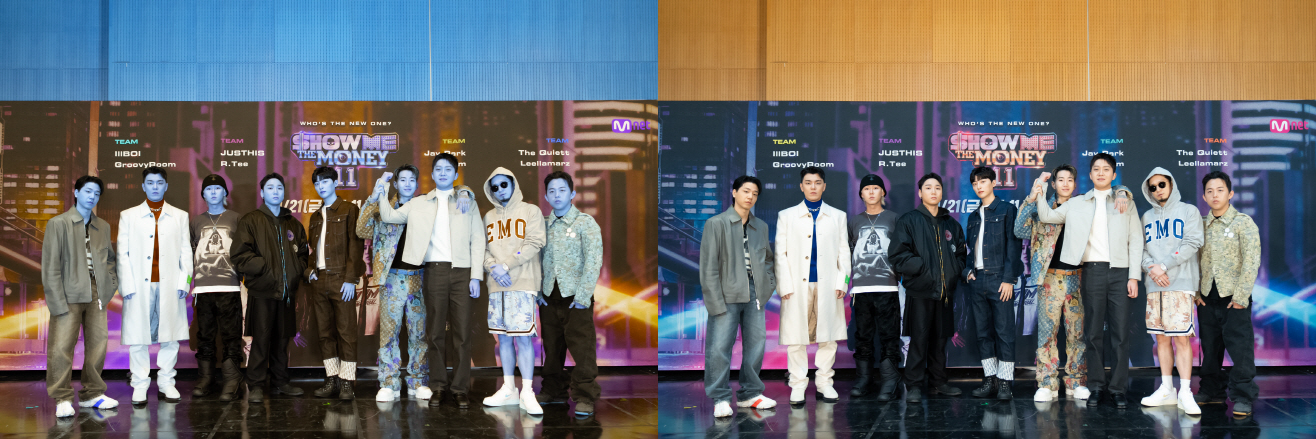

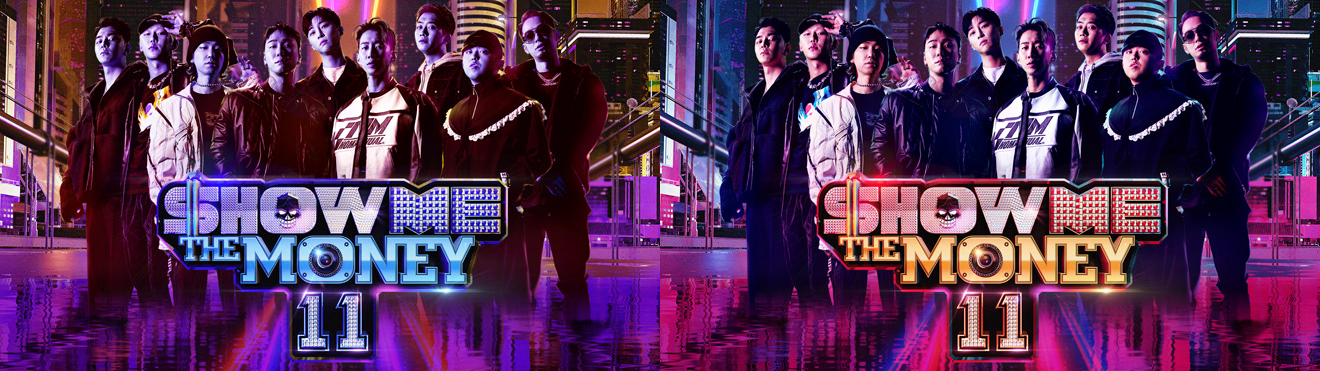

In [36]:
# Create a list to store the urls of the images
urls = ["https://img.asiatoday.co.kr/file/2022y/10m/21d/2022102101001750500106221.jpg",
        "https://static.mnetjp.com/res/program/2956/pg6358d83d356e9.jpg"
        ]  
# Read and display the image
# loop over the image URLs, you could store several image urls in the list

for url in urls:
  image = io.imread(url) 
  image_2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  final_frame = cv2.hconcat((image, image_2))
  cv2_imshow(final_frame)
  print('\n')

##Step3: Image Contours and Histograms

### Generate Histogram of grayscale image
Sometimes you want to enhance the contrast in your image or expand the contrast in a particular region while sacrificing the detail in colors that don’t vary much, or don’t matter. A good tool to find interesting regions is the histogram. To create a histogram of our image data, we use the matplot.pylab `hist()` function.

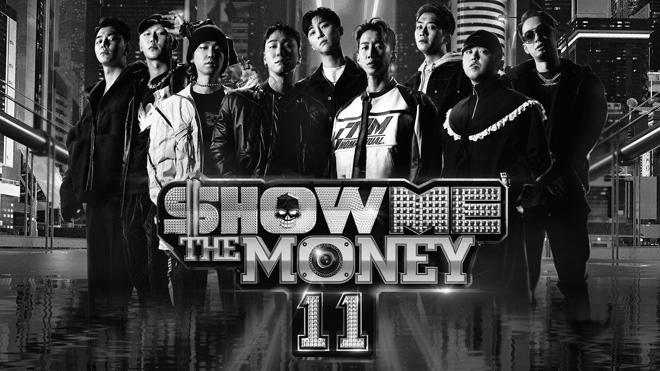

In [37]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

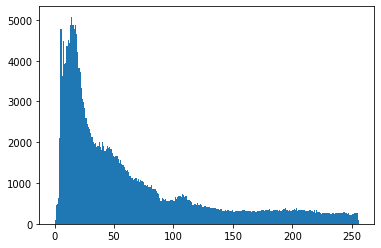

In [38]:
# Plot the histogram of the gray image. We could observe that the frequency of
# the image hist has decreased ~ 1/3 of the histogram of color image
plt.hist(gray_image.ravel(),bins = 256, range = [0, 256])
plt.show()

### Histogram Equalization
This section demonstrates histogram equalization on a dark image. This transform flattens the gray-level histogram so that all intensities are as equally common as possible. The transform function is a cumulative distribution function (cdf) of the pixel values in the image (normalized to map the range of pixel values to the desired range). This example uses image 4 (im4).

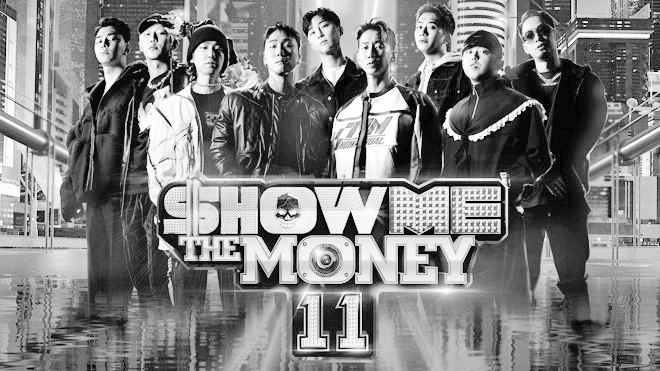

In [39]:
# apply the function on your dark image to increase the contrast
# we could observe that the contrast of the black background has increased
HE_image = cv2.equalizeHist(gray_image)
cv2_imshow(HE_image)

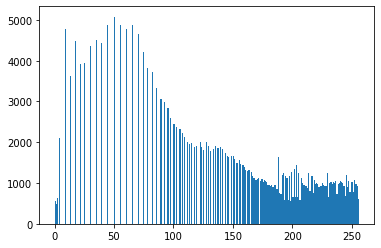

In [40]:
# Extra: try to visualize the histogram of the image after histogram equalization
# Before histogram equalization
plt.hist(HE_image.ravel(),bins = 256, range = [0, 256])
plt.show()

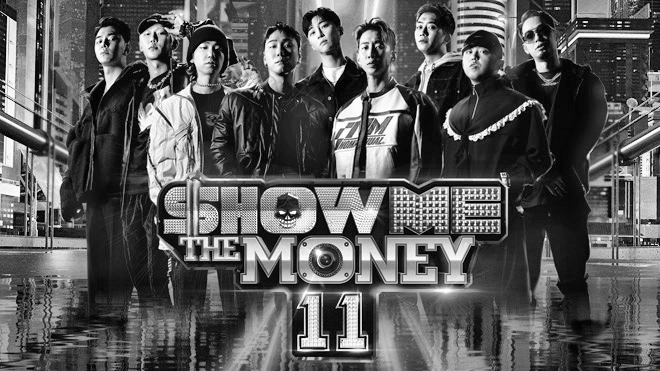

In [41]:
# apply the function on your dark image to increase the contrast
# we could observe that the contrast of the black background has increased
clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))
CLAHE_image = clahe.apply(gray_image)
cv2_imshow(CLAHE_image)

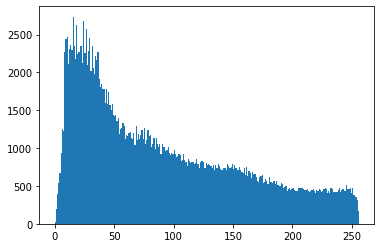

In [42]:
# Extra: try to visualize the histogram of the image after histogram equalization
# Before histogram equalization
plt.hist(CLAHE_image.ravel(),bins = 256, range = [0, 256])
plt.show()

## Add noise and apply smoothing


Orignal Image


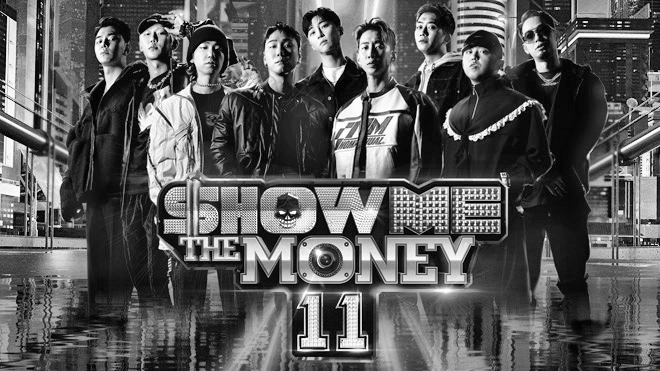


Noise


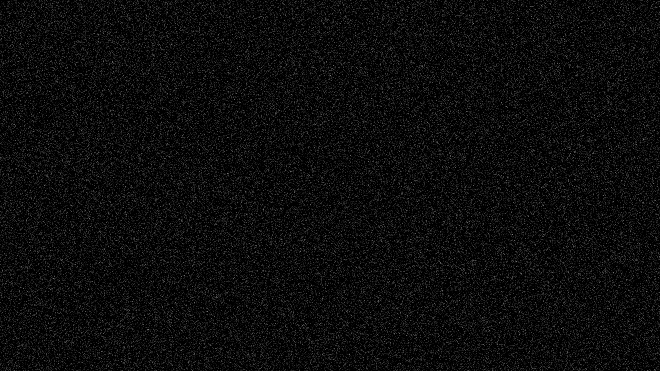


Noisy Image


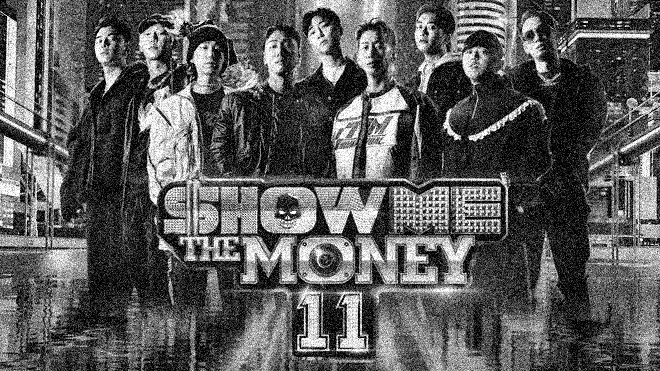


Smoothed Image


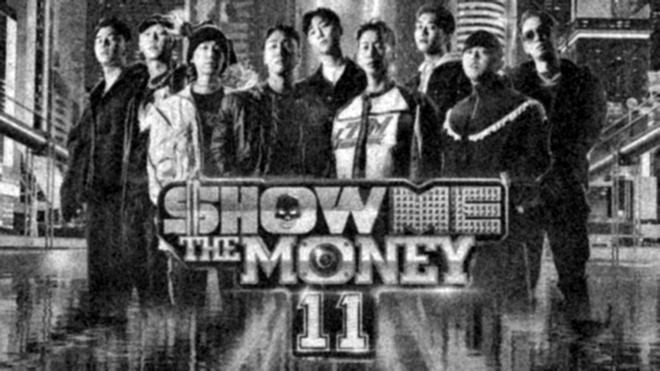

In [43]:
# noise generation
noise = np.random.normal(loc=0, scale=30, size=CLAHE_image.shape)

# noise overlaid over image
noisy_image = CLAHE_image + noise

# remove noise with smoothing
blur_image = cv2.GaussianBlur(noisy_image, (5,5), 0)

print("\nOrignal Image")
cv2_imshow(CLAHE_image)

print("\nNoise")
cv2_imshow(noise)

print("\nNoisy Image")
cv2_imshow(noisy_image)

print("\nSmoothed Image")
cv2_imshow(blur_image)

## Face detection
Download haar features `.xml` at github [repository](https://github.com/opencv/opencv/tree/master/data/haarcascades)

For face detection you should download `haarcascade_frontalface_default.xml`.

In [44]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

--2022-12-02 05:59:48--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml.1’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.008s  

2022-12-02 05:59:48 (115 MB/s) - ‘haarcascade_frontalface_default.xml.1’ saved [930127/930127]



Using LPB classifier, find faces in picture.

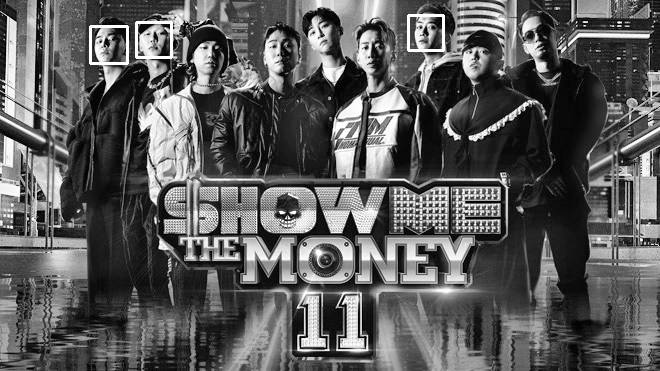

In [45]:
# Load the haar cascade face classifier file
haar_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Get the faces coordinates for all the faces in the image
faces_cordinates = haar_cascade.detectMultiScale(CLAHE_image);

copy_image = CLAHE_image.copy()
# Draw rectangle on detected faces
for (x1,y1,x2,y2) in faces_cordinates:
  cv2.rectangle(copy_image, (x1, y1), (x1+x2, y1+y2), (255), 2)

cv2_imshow(copy_image)

---
# TODO: 임의의 사진을 불러와서 OpenCV의 여러 기능을 적용하시오.

이미지 불러오기. 구글 등을 통해 검색하여 찾은 이미지의 주소를 이용하여 이미지를 불러오시오. [10점]

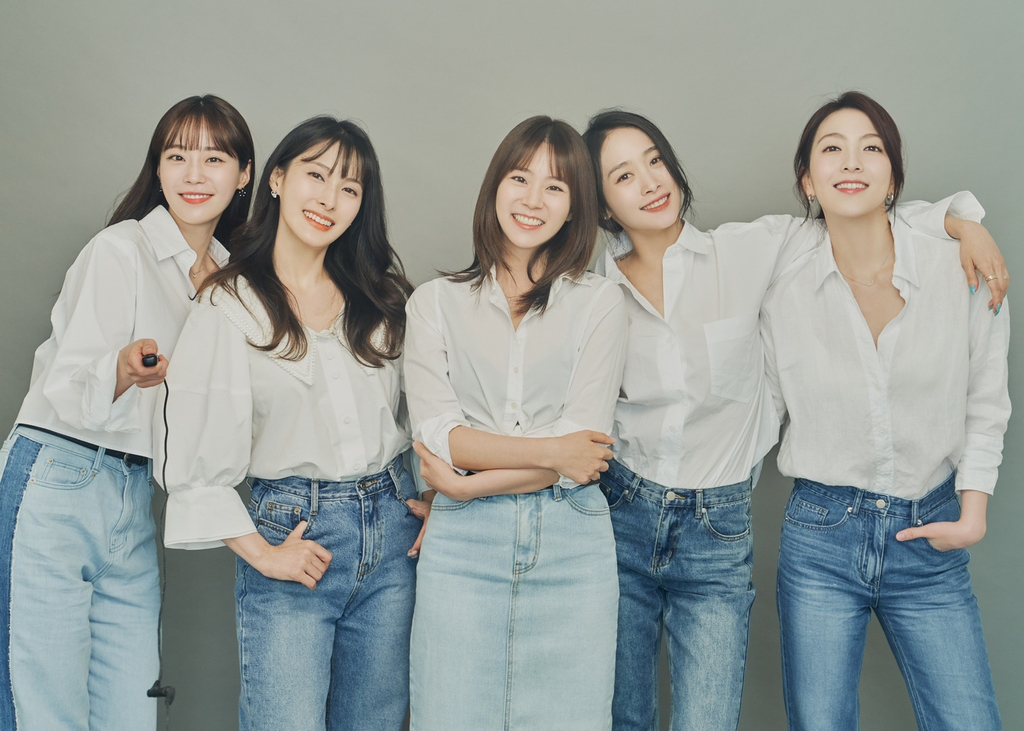

In [103]:
## TODO: LOAD IMAGE
url = ("https://img9.yna.co.kr/etc/inner/KR/2022/09/19/AKR20220919015200005_01_i_P4.jpg")
myImg = io.imread(url)  
cv2_imshow(cv2.cvtColor(myImg, cv2.COLOR_BGR2RGB))

다양한 이미지 전처리를 적용하시오. [개당 10점, 최소 2개]
- resize
- bluring
- histogram equalization
- flip
- and so on.

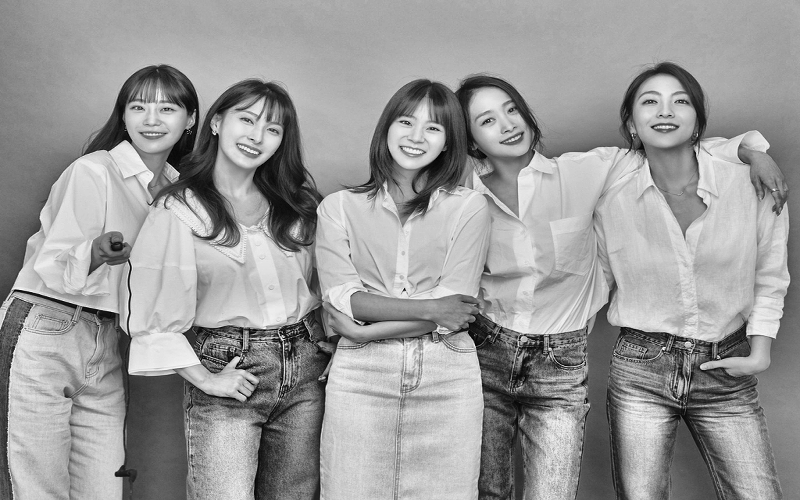

In [104]:
myGrayImg = cv2.cvtColor(myImg, cv2.COLOR_BGR2GRAY)

clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))
clahe_Img = clahe.apply(myGrayImg)

myImg = cv2.resize(clahe_Img, (800, 500), interpolation = cv2.INTER_CUBIC)
cv2_imshow(myImg)

LPB 분류기를 이용하여, 이미지 내에 오브젝트를 탐지해보시오 [20점].

학습된 다양한 Haar feature들은 [github repository](https://github.com/opencv/opencv/tree/master/data/haarcascades)에서 찾을 수 있습니다.

In [63]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml

--2022-12-02 06:18:01--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 341406 (333K) [text/plain]
Saving to: ‘haarcascade_eye.xml’

haarcascade_eye.xml 100%[===================>] 333.40K  --.-KB/s    in 0.004s  

2022-12-02 06:18:01 (76.0 MB/s) - ‘haarcascade_eye.xml’ saved [341406/341406]



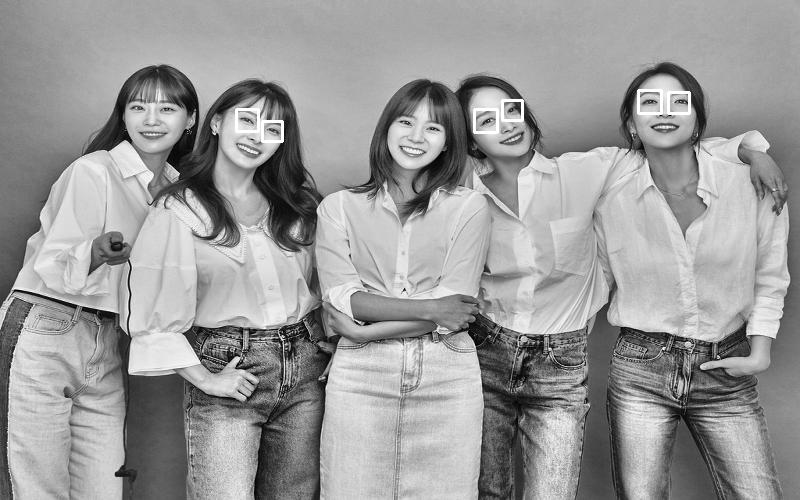

In [102]:
# Load the haar cascade face classifier file
haar_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

# Get the faces coordinates for all the faces in the image
object_cordinates = haar_cascade.detectMultiScale(myImg);

copy_image = myImg.copy()

# Draw rectangle on detected faces
for (x1,y1,x2,y2) in object_cordinates:
  cv2.rectangle(copy_image, (x1, y1), (x1+x2, y1+y2), (255), 2)

cv2_imshow(copy_image)